In [15]:
import numpy as np
from numpy.random import randint
from matplotlib import cm, pyplot as plt
from imageio import imread, imsave
from numpy.random import randint
import time

# Problem 1

Complete the following function, by implementing the anisotropic diffusion algorithm found in 10.1 for black and white images.
Run the function on balloon.jpg. Show the original image and the diffused image for σ = .1,
λ = .25, N = 5, 20, 100.

In [16]:
def anisdiff_bw(U, N, lam, g):
    """ Run the Anisotropic Diffusion differencing scheme
    on the array U of grayscale values for an image.
    Perform N iterations, use the function g
    to limit diffusion across boundaries in the image.
    Operate on U inplace to optimize performance. """
    U = np.pad(U, 1, mode='edge')

    for i in range(0, N):
        U[1:-1, 1:-1] = U[1:-1, 1:-1] + lam * (g(np.abs(U[:-2, 1:-1] - U[1:-1, 1:-1])) * (U[:-2, 1:-1] - U[1:-1, 1:-1]) + 
                       g(np.abs(U[2:, 1:-1] - U[1:-1, 1:-1])) * (U[2:, 1:-1] - U[1:-1, 1:-1]) + 
                       g(np.abs(U[1:-1, :-2] - U[1:-1, 1:-1])) * (U[1:-1, :-2] - U[1:-1, 1:-1]) + 
                       g(np.abs(U[1:-1, 2:] - U[1:-1, 1:-1])) * (U[1:-1, 2:] - U[1:-1, 1:-1]))
    return U[1:-1, 1:-1]

In [17]:
picture = imread('balloon.jpg', as_gray=True) * 1./255

sig = .1
lam = .25
g = lambda x: np.exp(-(x / sig)**2)
N = [0, 5, 20, 100]

pics = []
for n in N:
    pics.append(anisdiff_bw(picture, n, lam, g))

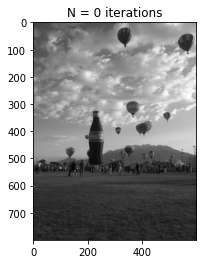

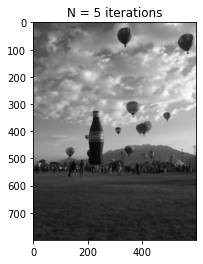

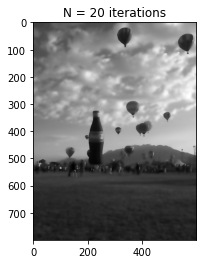

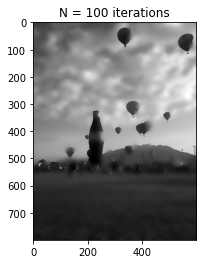

In [27]:
for n, pic in zip(N, pics):
    plt.imshow(pic, cmap=cm.gray)
    plt.title("N = {} iterations".format(n))
    plt.show()

# Problem 2

Complete the following function to process a colored image.
Run the function on balloons_color.jpg. Show the original image and the diused image for
σ = .1, λ = .25, N = 5, 20, 100.

In [19]:
def anisdiff_color(U, N, lambda_, sigma):
    """ Run the Anisotropic Diffusion differencing scheme
    on the array U of grayscale values for an image.
    Perform N iterations, use the function g = e^{-x^2/sigma^2}
    to limit diffusion across boundaries in the image.
    Operate on U inplace to optimize performance. """
    norm = lambda x: np.sqrt(np.sum(x**2, axis=2, keepdims=True))
    U = np.pad(U, 1, mode='edge')[:,:,1:-1]

    for i in range(0, N):
        U[1:-1, 1:-1] = U[1:-1, 1:-1] + lam * (g(np.abs(U[:-2, 1:-1] - U[1:-1, 1:-1])) * (U[:-2, 1:-1] - U[1:-1, 1:-1]) + 
                       g(norm(U[2:, 1:-1] - U[1:-1, 1:-1])) * (U[2:, 1:-1] - U[1:-1, 1:-1]) + 
                       g(norm(U[1:-1, :-2] - U[1:-1, 1:-1])) * (U[1:-1, :-2] - U[1:-1, 1:-1]) + 
                       g(norm(U[1:-1, 2:] - U[1:-1, 1:-1])) * (U[1:-1, 2:] - U[1:-1, 1:-1]))
    return U[1:-1, 1:-1]

In [20]:
picture_color = imread('balloons_color.jpg') * 1./255


sig = .1
lam = .25
g = lambda x: np.exp(-(x / sig)**2)
N = [0, 5, 20, 100]

pics_color = []
for n in N:
    pics_color.append(anisdiff_color(picture_color, n, lam, g))

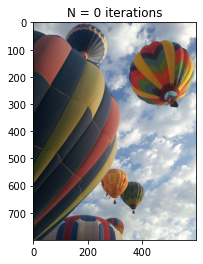

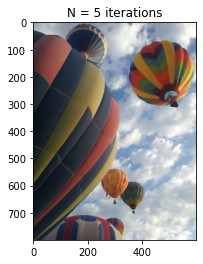

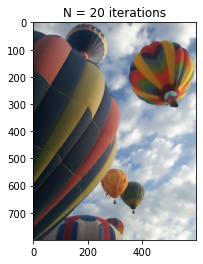

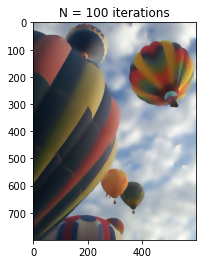

In [26]:
for n, pic in zip(N, pics_color):
    plt.imshow(pic)
    plt.title("N = {} iterations".format(n))
    plt.show()

# Problem 3

Run anisdiff_bw() on the noisy image with σ = .1, λ = .25, N = 20. Display the
original image and the noisy image. Explain why anisotropic diusion does not smooth out the
noise.

Use the following code to add noise to your grayscale image.

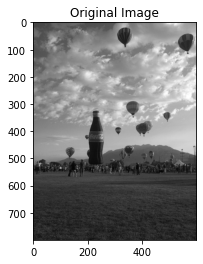

In [40]:
image = imread('balloon.jpg', as_gray=True)
plt.imshow(image, cmap = "gray")
plt.title("Original Image")
plt.show()

x, y = image.shape
for i in range(x*y//100):
    image[randint(x),randint(y)] = 127 + randint(127)

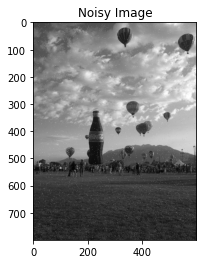

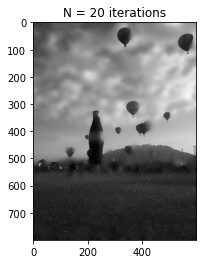

In [39]:
image = image * 1./255
plt.imshow(image, cmap=cm.gray)
plt.title("Noisy Image")
plt.show()

sig = .1
lam = .25
g = lambda x: np.exp(-(x / sig)**2)
N = 20
pics_noisy.append(anisdiff_bw(image, N, lam, g))
plt.imshow(pic, cmap='gray')
plt.title("N = {} iterations".format(N))
plt.show()

The type of blurring that we are doing doesn't work on these tiny grains for the same reason it doesn't blur edges- it is not designed to specifically take out the different parts of an image.

# Problem 4 (Optional)

Implement the minimum-biased finite diverence scheme described above. Add noise to
balloons_color.jpg using the provided code below, and clean it using your implementation.
Show the original image, the noised image, and the cleaned image.

In [24]:
image = imread('balloons_color.jpg')
x,y,z = image.shape
for dim in range(z):
    for i in range(x*y//100):
        # Assign a random value to a random place
        image[randint(x),randint(y),dim] = 127 + randint(127)
